## plot data with fiducial W19 model

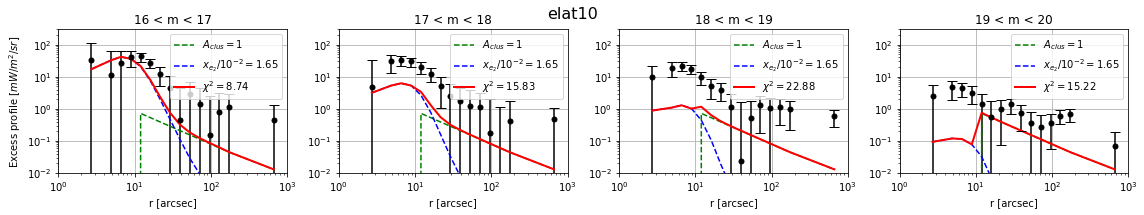

In [8]:
from run_fit import *

inst = 1
ifield = 4

fig, ax = plt.subplots(1, 4, figsize = (16,3))
for im in range(4):
    W19_params = gal_profile_model().Wang19_params(im)
    xe2 = W19_params['sersic2'][2]
    param_fit = fit_stacking_mcmc(inst, ifield, im)
    r_arr = param_fit.r_arr
    profd_arr = param_fit.profd_arr
    profd_err = param_fit.profd_err_diag
    profclus_arr = param_fit.profclus_arr
    profex_arr = param_fit.get_profexcess_model()
    chi2 = param_fit.get_chi2()
    
    ax[im].loglog(r_arr, profclus_arr,'g--', label = '$A_{clus}=$%d'%1)
    ax[im].loglog(r_arr, profex_arr,'b--', label = '$x_{e_2}/10^{-2}=$%.2f'%(xe2/1e-2))
    ax[im].loglog(r_arr, profex_arr + profclus_arr,'r-', lw=2,
                 label = '$\chi^2=$%.2f'%chi2)
    ax[im].errorbar(r_arr, profd_arr, profd_err, 
                 fmt='.', color='k',capsize=5, markersize=10)
    ax[im].set_title('%d < m < %d'%(param_fit.m_min, param_fit.m_max))
    ax[im].set_ylim([1e-2,3e2])
    ax[im].set_xlim([1e0,1e3])
    ax[im].grid()
    ax[im].legend()
    ax[im].set_xlabel('r [arcsec]')
ax[0].set_ylabel('Excess profile [$mW/m^2/sr$]')
fig.suptitle(fieldnamedict[ifield], fontsize=16)

plt.tight_layout()
plt.savefig('plots/profile_fiducial_%s.png'%param_fit.field, dpi = 150)

## MCMC best fit

how to find the best fit combination of param??

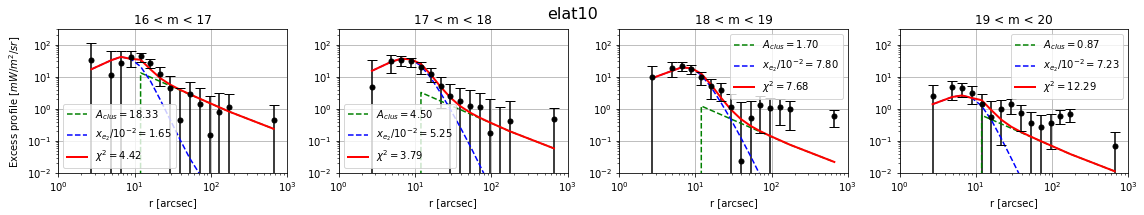

In [7]:
from run_fit import *

inst = 1
ifield = 4

fig, ax = plt.subplots(1, 4, figsize = (16,3))
for im in range(4):
    W19_params = gal_profile_model().Wang19_params(im)
    param_fit = fit_stacking_mcmc(inst, ifield, im)
    savedir = mypaths['alldat'] + 'TM' + str(param_fit.inst) + '/'
    savename = 'mcmc_2par_' + param_fit.field + \
    '_m' + str(param_fit.m_min) + '_' + str(param_fit.m_max) + '.npy'
    samples = np.load(savedir + savename)
    flatsamps = samples.copy()
    flatsamps = flatsamps[100:,:,:].reshape((-1,2))
   
    xe2, Aclus = np.median(flatsamps, axis=0)
    
    r_arr = param_fit.r_arr
    profd_arr = param_fit.profd_arr
    profd_err = param_fit.profd_err_diag
    profclus_arr = param_fit.profclus_arr
    profex_arr = param_fit.get_profexcess_model(xe2=xe2)
    chi2 = param_fit.get_chi2(xe2=xe2, Aclus=Aclus)

    ax[im].loglog(r_arr, Aclus*profclus_arr,'g--', label = '$A_{clus}=$%.2f'%Aclus)
    ax[im].loglog(r_arr, profex_arr,'b--', label = '$x_{e_2}/10^{-2}=$%.2f'%(xe2/1e-2))
    ax[im].loglog(r_arr, profex_arr + Aclus*profclus_arr,'r-', lw=2,
                 label = '$\chi^2=$%.2f'%chi2)
    ax[im].errorbar(r_arr, profd_arr, profd_err, 
                 fmt='.', color='k',capsize=5, markersize=10)
    ax[im].set_title('%d < m < %d'%(param_fit.m_min, param_fit.m_max))
    ax[im].set_ylim([1e-2,3e2])
    ax[im].set_xlim([1e0,1e3])
    ax[im].grid()
    ax[im].legend()
    ax[im].set_xlabel('r [arcsec]')
ax[0].set_ylabel('Excess profile [$mW/m^2/sr$]')
fig.suptitle(fieldnamedict[ifield], fontsize=16)

plt.tight_layout()
plt.savefig('plots/profile_best_%s.png'%param_fit.field, dpi = 150)

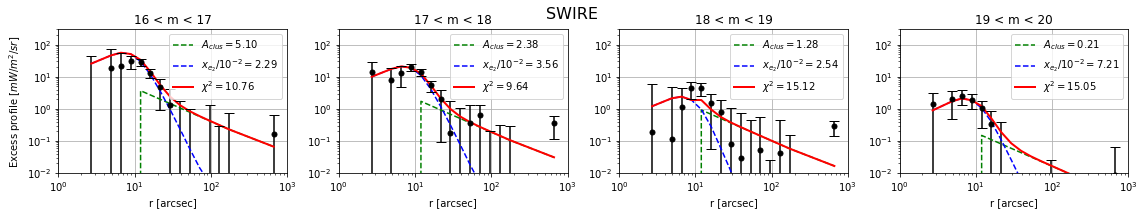

In [9]:
from run_fit import *

inst = 1
ifield = 8

fig, ax = plt.subplots(1, 4, figsize = (16,3))
for im in range(4):
    W19_params = gal_profile_model().Wang19_params(im)
    param_fit = fit_stacking_mcmc(inst, ifield, im)
    savedir = mypaths['alldat'] + 'TM' + str(param_fit.inst) + '/'
    savename = 'mcmc_2par_' + param_fit.field + \
    '_m' + str(param_fit.m_min) + '_' + str(param_fit.m_max) + '.npy'
    samples = np.load(savedir + savename)
    flatsamps = samples.copy()
    flatsamps = flatsamps[100:,:,:].reshape((-1,2))
   
    xe2, Aclus = np.median(flatsamps, axis=0)
    
    r_arr = param_fit.r_arr
    profd_arr = param_fit.profd_arr
    profd_err = param_fit.profd_err_diag
    profclus_arr = param_fit.profclus_arr
    profex_arr = param_fit.get_profexcess_model(xe2=xe2)
    chi2 = param_fit.get_chi2(xe2=xe2, Aclus=Aclus)

    ax[im].loglog(r_arr, Aclus*profclus_arr,'g--', label = '$A_{clus}=$%.2f'%Aclus)
    ax[im].loglog(r_arr, profex_arr,'b--', label = '$x_{e_2}/10^{-2}=$%.2f'%(xe2/1e-2))
    ax[im].loglog(r_arr, profex_arr + Aclus*profclus_arr,'r-', lw=2,
                 label = '$\chi^2=$%.2f'%chi2)
    ax[im].errorbar(r_arr, profd_arr, profd_err, 
                 fmt='.', color='k',capsize=5, markersize=10)
    ax[im].set_title('%d < m < %d'%(param_fit.m_min, param_fit.m_max))
    ax[im].set_ylim([1e-2,3e2])
    ax[im].set_xlim([1e0,1e3])
    ax[im].grid()
    ax[im].legend()
    ax[im].set_xlabel('r [arcsec]')
ax[0].set_ylabel('Excess profile [$mW/m^2/sr$]')
fig.suptitle(fieldnamedict[ifield], fontsize=16)

plt.tight_layout()
plt.savefig('plots/profile_best_%s.png'%param_fit.field, dpi = 150)

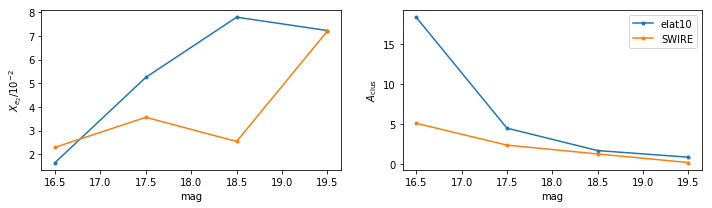

In [1]:
from run_fit import *

inst = 1

fig, ax = plt.subplots(1, 2, figsize = (10,3))
for ifield in [4,8]:
    m_arr = np.zeros(4)
    xe2_arr = np.zeros(4)
    Aclus_arr = np.zeros(4)
    for im in range(4):
        param_fit = fit_stacking_mcmc(inst, ifield, im)
        savedir = mypaths['alldat'] + 'TM' + str(param_fit.inst) + '/'
        savename = 'mcmc_2par_' + param_fit.field + \
        '_m' + str(param_fit.m_min) + '_' + str(param_fit.m_max) + '.npy'
        samples = np.load(savedir + savename)
        flatsamps = samples.copy()
        flatsamps[:,:,0] = flatsamps[:,:,0] * 1e2
        flatsamps = flatsamps[100:,:,:].reshape((-1,2))

        xe2, Aclus = np.median(flatsamps, axis=0)
        xe2_arr[im] = xe2
        Aclus_arr[im] = Aclus
        m_arr[im] = (param_fit.m_min + param_fit.m_max)/2

    ax[0].plot(m_arr, xe2_arr, '.-')
    ax[1].plot(m_arr, Aclus_arr, '.-', label = param_fit.field)

ax[1].legend()
ax[0].set_xlabel('mag')
ax[0].set_ylabel(r"$X_{e_2}/10^{-2}$")
ax[1].set_xlabel('mag')
ax[1].set_ylabel(r"$A_{\rm clus}$")

plt.tight_layout()
plt.savefig('plots/params_best.png', dpi = 150)

## MCMC corner plots

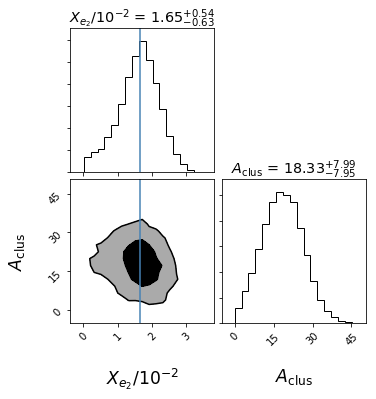

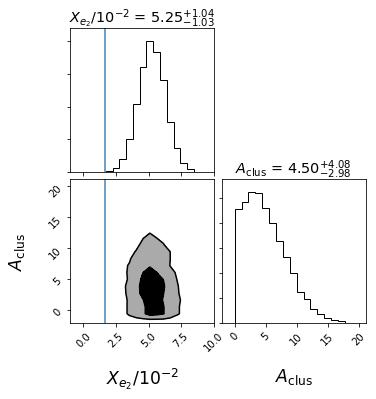

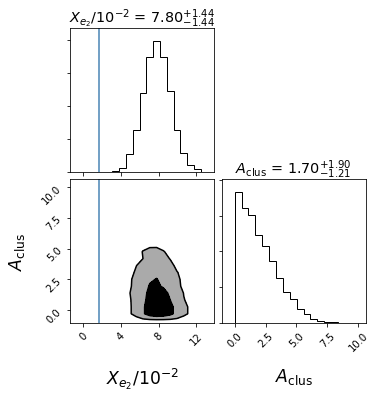

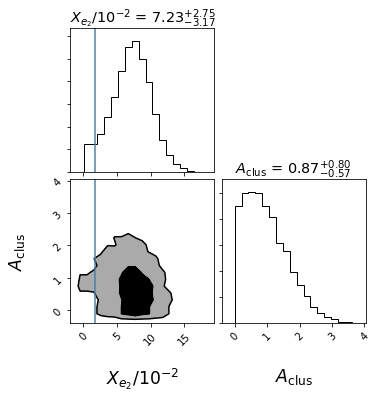

In [5]:
from run_fit import *
import corner

inst = 1
ifield = 4
for im in range(4):
    W19_params = gal_profile_model().Wang19_params(im)
    param_fit = fit_stacking_mcmc(inst, ifield, im)
    savedir = mypaths['alldat'] + 'TM' + str(param_fit.inst) + '/'
    savename = 'mcmc_2par_' + param_fit.field + \
    '_m' + str(param_fit.m_min) + '_' + str(param_fit.m_max) + '.npy'

    samples = np.load(savedir + savename)
    steps, nwalkers, nparams = samples.shape

    flatsamps = samples.copy()
    flatsamps[:,:,0] = flatsamps[:,:,0] * 1e2
    flatsamps = flatsamps[100:,:,:].reshape((-1,2))
    
    bins0 = np.linspace(np.min(flatsamps[:,0]), np.max(flatsamps[:,0]), 20)
    bins1 = np.linspace(np.min(flatsamps[:,1]), np.max(flatsamps[:,1]), 20)
    
    levels= 1.0 - np.exp(-0.5 * np.arange(1, 2.1, 1) ** 2)
    figure = corner.corner(flatsamps, levels = levels,fill_contours=True,plot_datapoints=False,
                           bins=[bins0, bins1],label_kwargs={'fontsize':'xx-large'},
                           range=[(-np.percentile(flatsamps[:,0], 100)/10,
                                   np.percentile(flatsamps[:,0], 100)),
                                  (-np.percentile(flatsamps[:,1], 100)/10,
                                   np.percentile(flatsamps[:,1], 100))],
                           title_kwargs={'fontsize':'x-large'},
                           show_titles=True,labels=["$X_{e_2}/10^{-2}$", r"$A_{\rm clus}$"],
                           truths=[1.65,None])
    plt.savefig('plots/mcmc_%s_m%d_%d.png'\
                %(param_fit.field, param_fit.m_min, param_fit.m_max), dpi=150)

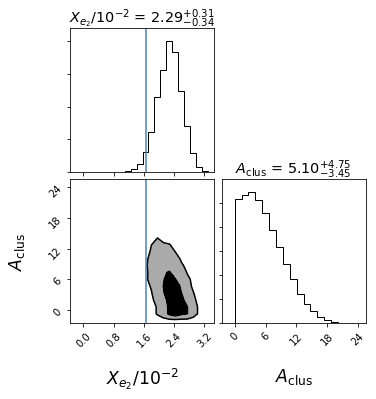

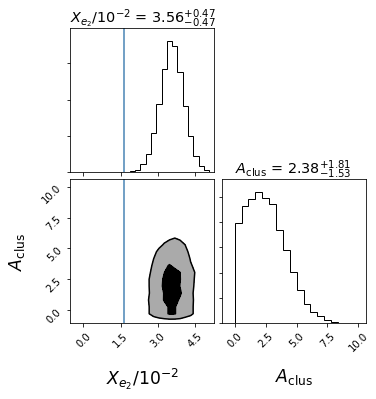

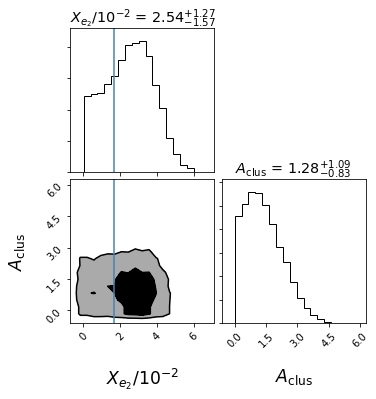

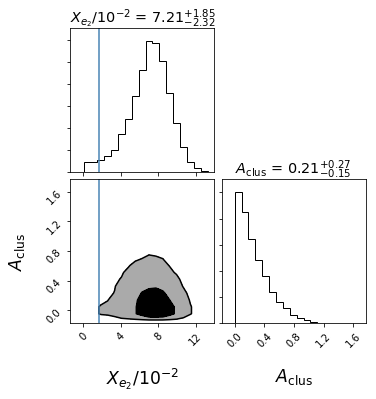

In [6]:
from run_fit import *
import corner

inst = 1
ifield = 8
for im in range(4):
    W19_params = gal_profile_model().Wang19_params(im)
    param_fit = fit_stacking_mcmc(inst, ifield, im)
    savedir = mypaths['alldat'] + 'TM' + str(param_fit.inst) + '/'
    savename = 'mcmc_2par_' + param_fit.field + \
    '_m' + str(param_fit.m_min) + '_' + str(param_fit.m_max) + '.npy'

    samples = np.load(savedir + savename)
    steps, nwalkers, nparams = samples.shape

    flatsamps = samples.copy()
    flatsamps[:,:,0] = flatsamps[:,:,0] * 1e2
    flatsamps = flatsamps[100:,:,:].reshape((-1,2))
    
    bins0 = np.linspace(np.min(flatsamps[:,0]), np.max(flatsamps[:,0]), 20)
    bins1 = np.linspace(np.min(flatsamps[:,1]), np.max(flatsamps[:,1]), 20)
    
    levels= 1.0 - np.exp(-0.5 * np.arange(1, 2.1, 1) ** 2)
    figure = corner.corner(flatsamps, levels = levels,fill_contours=True,plot_datapoints=False,
                           bins=[bins0, bins1],label_kwargs={'fontsize':'xx-large'},
                           range=[(-np.percentile(flatsamps[:,0], 100)/10,
                                   np.percentile(flatsamps[:,0], 100)),
                                  (-np.percentile(flatsamps[:,1], 100)/10,
                                   np.percentile(flatsamps[:,1], 100))],
                           title_kwargs={'fontsize':'x-large'},
                           show_titles=True,labels=["$X_{e_2}/10^{-2}$", r"$A_{\rm clus}$"],
                           truths=[1.65,None])
    plt.savefig('plots/mcmc_%s_m%d_%d.png'\
                %(param_fit.field, param_fit.m_min, param_fit.m_max), dpi=150)

## plot the chains

Text(0, 0.5, '$A_{clus}$')

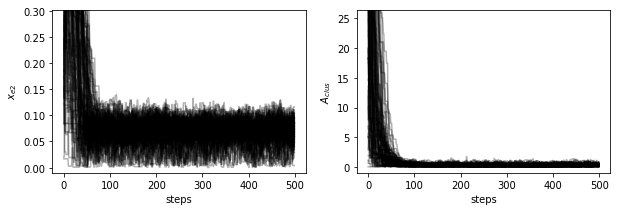

In [22]:
from run_fit import *

inst = 1
ifield = 8
im = 3

W19_params = gal_profile_model().Wang19_params(im)
param_fit = fit_stacking_mcmc(inst, ifield, im)
savedir = mypaths['alldat'] + 'TM' + str(param_fit.inst) + '/'
savename = 'mcmc_2par_' + param_fit.field + \
'_m' + str(param_fit.m_min) + '_' + str(param_fit.m_max) + '.npy'

samples = np.load(savedir + savename)
steps, nwalkers, nparams = samples.shape

fig, ax = plt.subplots(1,2, figsize=(10,3))
for i in range(nwalkers):
    ax[0].plot(samples[:,i,0], "k", alpha=0.3)
    ax[1].plot(samples[:,i,1], "k", alpha=0.3)

med = np.median(samples[:,:,0])
std = np.std(samples[:,:,0])
ax[0].set_ylim([-0.01, med+2*std])
ax[0].set_xlabel('steps')
ax[0].set_ylabel('$x_{e2}$')

med = np.median(samples[:,:,1])
std = np.std(samples[:,:,1])
ax[1].set_ylim([-1, med+4*std])
ax[1].set_xlabel('steps')
ax[1].set_ylabel('$A_{clus}$')
